In [108]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [109]:
with open('output.json') as file:
    data = json.load(file)

In [110]:
# data.keys()
# data["https://www.fiaformula2.com/Results?raceid=972"]['drivers']['Sprint Race Results']

К сожалению учитывая способ получения данных, нам придется обрабатывать каждую таблицу отдельно

In [111]:
def data_analysis(url):
    sprint_race = pd.DataFrame(
        data[url]['drivers']['Sprint Race Results'])
    feature_race = pd.DataFrame(
        data[url]['drivers']['Feature Race Results'])
    qualifying = pd.DataFrame(
        data[url]['drivers']['Qualifying Session Results'])

    print(
        f"Гонка проходит на трассе: {data[url]['track']['Track Name']} в {data[url]['track']['Country']} {data[url]['track']['City']} {data[url]['track']['Date']}. Трасса длиной в {data[url]['track']['Length (Km)']} киллометра")

    print('На sprint_race:')
    display(sprint_race.head())
    print('На feature_race:')
    display(feature_race.head())
    print('На qualifying:')
    display(qualifying.head())

    print("Статистика по гонщикам: ")
    print('На sprint_race:')
    display(sprint_race.describe())
    print('На feature_race:')
    display(feature_race.describe())
    print('На qualifying:')
    display(qualifying.describe())

    print("Количество уникальных гонщиков: ")
    print('На sprint_race:')
    display(sprint_race['Driver Name'].value_counts())
    print('На feature_race:')
    display(feature_race['Driver Name'].value_counts())
    print('На qualifying:')
    display(qualifying['Driver Name'].value_counts())

    print("Количество уникальных значений: ")
    print('На sprint_race:')
    display(sprint_race.nunique())
    print('На feature_race:')
    display(feature_race.nunique())
    print('На qualifying:')
    display(qualifying.nunique())


In [112]:
# for i in data.keys():
#     data_analysis(i)

Проанализировав данные, можно дальше исследовать их

In [113]:
points = {}
points_feature_race = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}
points_sprint_race = {1: 15, 2: 12, 3: 10, 4: 8, 5: 6, 6: 4, 7: 2, 8: 1}


def points_counter(url):
    sprint_race = pd.DataFrame(data[url]['drivers']['Sprint Race Results'])
    feature_race = pd.DataFrame(data[url]['drivers']['Feature Race Results'])

    for k in range(len(sprint_race)):
        racer = sprint_race.loc[k, 'Driver Name']
        position = sprint_race.loc[k, 'Position']
        if racer in points:
            points[racer] += points_sprint_race.get(position, 0)
        else:
            points[racer] = points_sprint_race.get(position, 0)

    for j in range(len(feature_race)):
        racer = feature_race.loc[j, 'Driver Name']
        position = feature_race.loc[j, 'Position']
        if racer in points:
            points[racer] += points_feature_race.get(position, 0)
        else:
            points[racer] = points_feature_race.get(position, 0)


for i in data:
    points_counter(i)

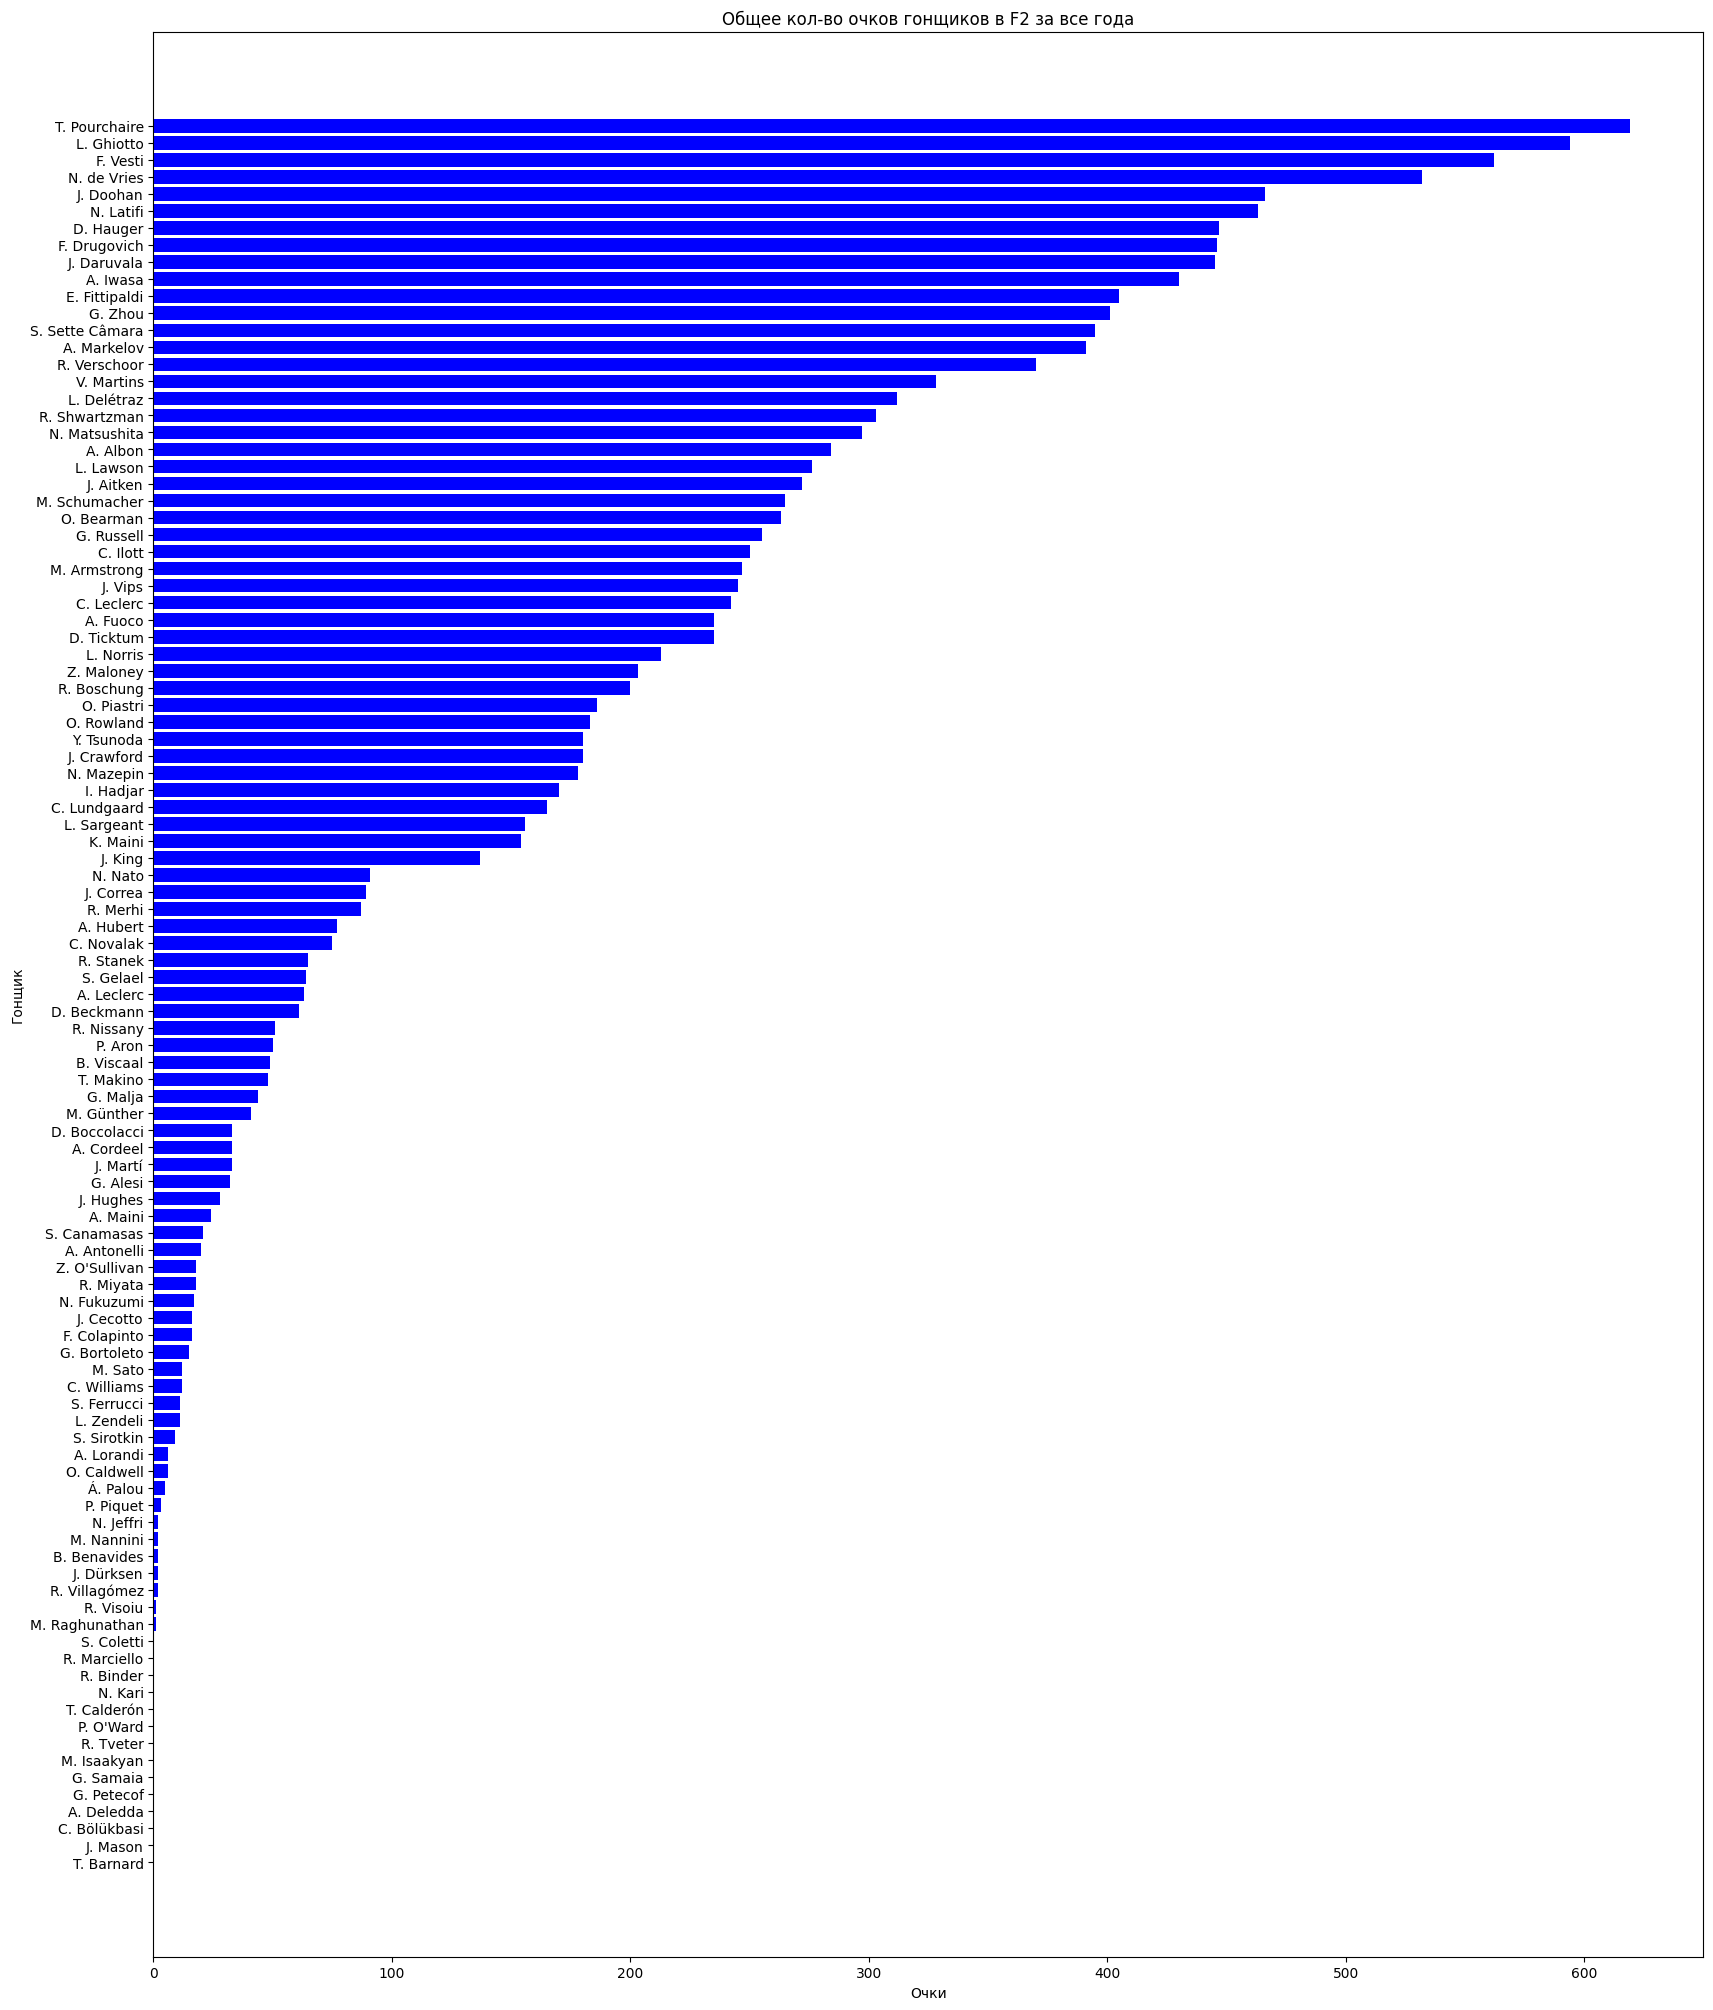

In [114]:
points = sorted(points.items(), key = lambda item: item[1], reverse = True)
drivers, points = zip(*points)

plt.figure(figsize = (20, 25))
plt.barh(drivers, points, color = 'blue')
plt.xlabel('Очки')
plt.ylabel('Гонщик')
plt.title('Общее кол-во очков гонщиков в F2 за все года')
plt.gca().invert_yaxis()
plt.show()